# **Alura Challenge - Robot Trading**

## **1. Configuración del Ambiente**

In [1]:
# !python -V
# print('------')
# !pip show Pandas | grep 'Name\|Version'
# print('------')
# !pip show Numpy | grep 'Name\|Version'
# print('------')
# !pip show Matplotlib | grep 'Name\|Version'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from urllib.request import urlopen
from bs4 import BeautifulSoup

global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

## **2. Obtención de Datos**

### Extracción de histórico de BITCOIN. (Periodo = 7d, Intervalo = 5min)

In [3]:
bitcoin = yf.Ticker('BTC-USD')
def importar_base_bitcoin():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

df_bitcoin = bitcoin.history(period='5d', interval='5m')
df_bitcoin.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-10-20 00:00:00+00:00,68366.562500,68376.835938,68366.562500,68376.835938,0,0.0,0.0
2024-10-20 00:05:00+00:00,68373.335938,68401.195312,68373.335938,68397.031250,0,0.0,0.0
2024-10-20 00:10:00+00:00,68378.429688,68402.437500,68378.429688,68402.437500,20887552,0.0,0.0
2024-10-20 00:15:00+00:00,68414.007812,68414.007812,68400.500000,68404.062500,42072064,0.0,0.0
2024-10-20 00:20:00+00:00,68410.476562,68418.773438,68408.109375,68412.882812,8969216,0.0,0.0


### Extracción de precio actual de Bitcoin (Web Scraping 'https://coinmarketcap.com/')

In [4]:
def extraer_tendencias():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  url = 'https://coinmarketcap.com/'
  response = urlopen(url)
  html = response.read()
  soup = BeautifulSoup(html, 'html.parser')

  # Extracción de precio actual
  precio_actual = soup.find('div', {'class':['sc-b3fc6b7-0 dzgUIj', 'sc-b3fc6b7-0 dzgUIj rise', 'sc-b3fc6b7-0 dzgUIj fall']}).get_text().replace('$','').replace(',','')
  precio_actual = float(precio_actual)

  # Extracción de la tendencia
  tendencia = ''
  if 'icon-Caret-up' in soup.findChild('span', {'class':['icon-Caret-up', 'icon-Caret-down']}):
    tendencia = 'alta'
  else:
    tendencia = 'baja'

  return precio_actual, tendencia


66671.0 baja


## **3. Limpieza de Datos**

### Función de limpieza

In [20]:
def limpieza_datos():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

  df_bitcoin_limpio = df_bitcoin.copy()
  df_bitcoin_limpio = df_bitcoin_limpio.drop_duplicates()
  df_bitcoin_limpio['Close'] = df_bitcoin_limpio['Close'].fillna(0)
  df_bitcoin_limpio = df_bitcoin_limpio.loc[df_bitcoin_limpio['Volume'] >= 0]

  q1 = df_bitcoin_limpio['Close'].quantile(0.25)
  q3 = df_bitcoin_limpio['Close'].quantile(0.75)
  df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= q1) & (df_bitcoin_limpio['Close'] <= q3)]

  media_bitcoin = df_bitcoin_limpio['Close'].mean().round(2)

  return df_bitcoin_limpio, media_bitcoin


## **4. Toma de Decisiones**

### 4.1 Creación de Algoritmo para la toma de decisión:

In [21]:
def tomar_decisiones():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

  algoritmo_decision = ''

  if ((precio_actual >= media_bitcoin) & (tendencia == 'baja')):
    algoritmo_decision = 'Vender'
  elif ((precio_actual < media_bitcoin) & (tendencia == 'alta')):
    algoritmo_decision = 'Comprar'
  else:
    algoritmo_decision = 'Esperar'

  return algoritmo_decision


## 5. **Visualización de Resultados**

### 5.1 Visualización

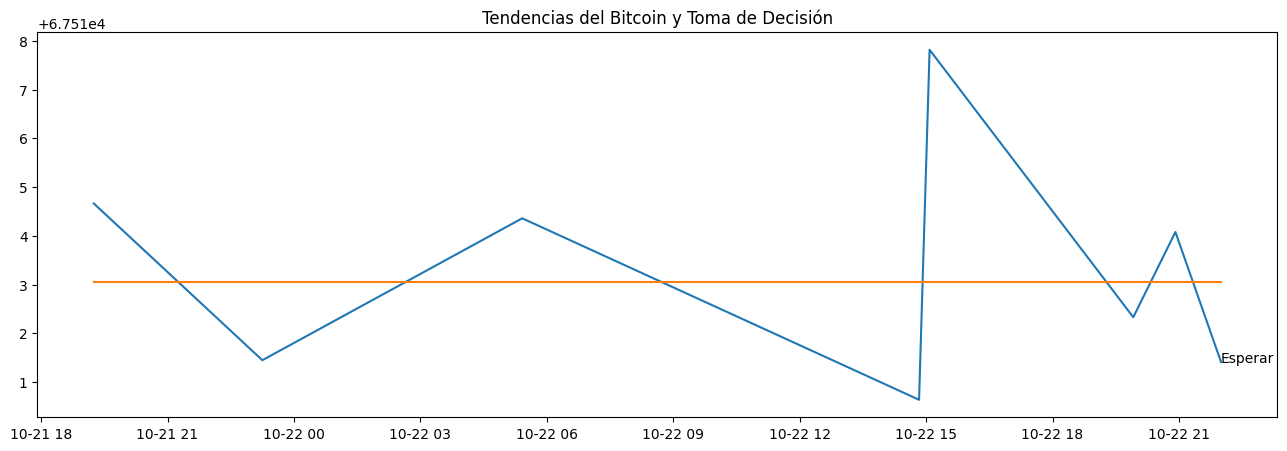

In [52]:
def visualizacion():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

  df_bitcoin['Promedio'] = media_bitcoin
  ultimo_indice = df_bitcoin.index[-1]
  ultimo_valor = df_bitcoin['Close'].iloc[-1]

  fig = plt.figure(figsize=(16,5))
  plt.title('Tendencias del Bitcoin y Toma de Decisión')
  plt.plot(df_bitcoin.index, df_bitcoin['Close'])
  plt.plot(df_bitcoin.index, df_bitcoin['Promedio'])
  plt.annotate(algoritmo_decision, xy=(ultimo_indice,ultimo_valor), xytext=(ultimo_indice,ultimo_valor), color='black')
  plt.show()

## **5. Automatización**

### 5.1 Importación de Librerías

In [53]:
from IPython.display import clear_output
import time

### 5.2 Loop Infinito

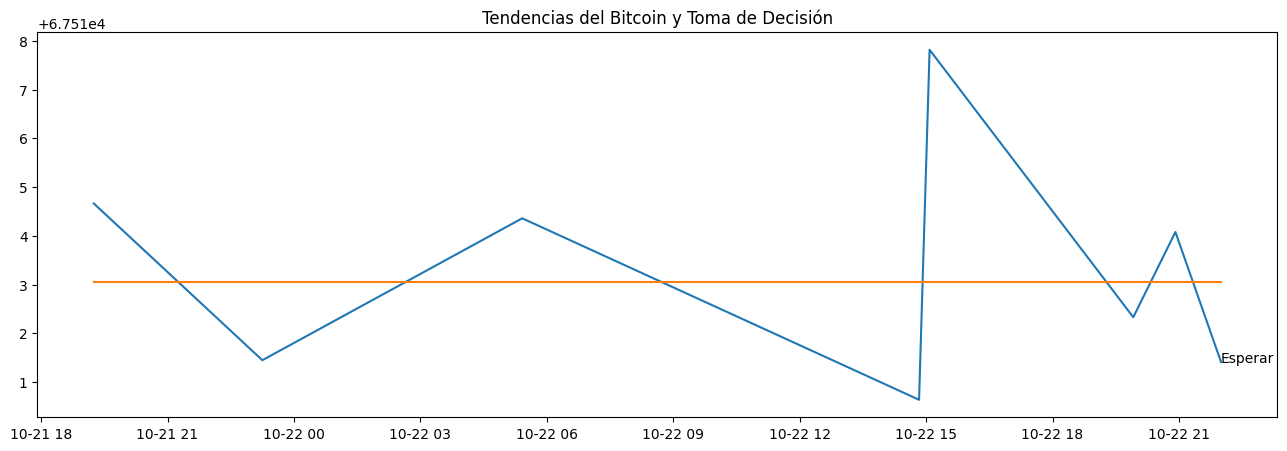

KeyboardInterrupt: 

In [54]:
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)